Introduction
Coworking and flexi work space concepts have gained a lot of traction in recent years. These are arrangements in which workers from different companies share an office space, allowing cost savings and convenience through the use of common infrastructure, such as equipment and utilities and in some cases includes meals, refreshments and postal services. It is attractive to independent contractors, independent scientists, telecommuting and work-at-home professionals, and people who travel frequently.

Problem Description
Coworking facilities have high maintenance costs and their profitability directly depends on the occupancy rates and overhead costs on account of rent, free services such as meals, refreshments, gyms etc. Further location is very important for success of these facilities. So, identification of appropriate location for setting up such facility is a key success factor.
This project aims to aid the user with choosing an ideal location for such a facility in the Toronto area. It uses neighbourhood segmenting and clustering to group boroughs in the city and on this basis provides insights to 4 neighbourhood clusters to choose from based on 3 factors
a.	Surrounding facilities such as cafes, restaurants in the cluster (higher the better)
b.	Average real estate rental (lower the better)
c.	Number of postal codes (as surrogate to area/ size of cluster) in the cluster (higher the better)
The first 2 factors will enable lower overhead costs, whereas the last factor will increase the catchment areas increase potential customers.


Importing libraries and creating enviornment

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

In [2]:
!conda install -c conda-forge folium --yes
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.10.1              |             py_0          59 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTAL

In [3]:
import time
from geopy.geocoders import Nominatim
import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Importing to use the Foursquare API lab
import folium # map rendering library

Data Extraction and Cleaning:
Data extrcated from The FOURSQUARE API, wikidedia and kaggle is cleaned to be utilised in the data analysis section

In [4]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [5]:
dframe_list = pd.io.html.read_html(url)

In [6]:
dframe = dframe_list[0]

In [7]:
dframe.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [8]:
dframe.dropna(inplace = True)

In [9]:
dframe.head()

,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [10]:
#Keeping nbr_ungrp for ease of location calculations, using nbr1 by dropping Non Toronto Boroughs.
# define the dataframe columns
column_names = ['Postal code','Borough', 'Neighborhood'] 
# instantiate the dataframe
nbr_ungrp = pd.DataFrame(columns=column_names)

nbr_ungrp = dframe.drop(dframe[dframe['Borough'].str.contains("Toronto")==False].index, axis=0, inplace=False)

#Reset Index
nbr_ungrp.index = pd.RangeIndex(len(nbr_ungrp.index))

#Uncomment below to view Dataframe
print(nbr_ungrp)

   Postal code           Borough                                       Neighborhood
0          M5A  Downtown Toronto                         Regent Park / Harbourfront
1          M7A  Downtown Toronto       Queen's Park / Ontario Provincial Government
2          M5B  Downtown Toronto                           Garden District, Ryerson
3          M5C  Downtown Toronto                                     St. James Town
4          M4E      East Toronto                                        The Beaches
5          M5E  Downtown Toronto                                        Berczy Park
6          M5G  Downtown Toronto                                 Central Bay Street
7          M6G  Downtown Toronto                                           Christie
8          M5H  Downtown Toronto                         Richmond / Adelaide / King
9          M6H      West Toronto                      Dufferin / Dovercourt Village
10         M5J  Downtown Toronto  Harbourfront East / Union Station / Toront

In [11]:
geolocator = Nominatim(user_agent="my_app app123")
#print('here')

for row_index, item in nbr_ungrp.iterrows():
    
    list1 = nbr_ungrp.loc[[row_index],['Neighborhood']].values.astype('str')
    loc = ' , Toronto, Ontario, Canada'
    list1.astype('str')
    list1 = np.append(list1, loc)
    latitude = None
    longitude = None
    location = None
    
    location = geolocator.geocode(list1 , limit = 15)
    #print(loc)
    #print(row_index)
    time.sleep(5)
    if(location is not None):
        #print(location)
        #print("location Address : ")
        #print(location.address)
        #print('latitude, longitude : ')
        #print((location.latitude, location.longitude))
        nbr_ungrp.loc[nbr_ungrp.index[row_index], 'Latitude'] = location.latitude
        nbr_ungrp.loc[nbr_ungrp.index[row_index], 'Longitude'] = location.longitude
        #print(nbr_ungrp[row_index])    

print(nbr_ungrp)

   Postal code           Borough                                       Neighborhood   Latitude  Longitude
0          M5A  Downtown Toronto                         Regent Park / Harbourfront        NaN        NaN
1          M7A  Downtown Toronto       Queen's Park / Ontario Provincial Government        NaN        NaN
2          M5B  Downtown Toronto                           Garden District, Ryerson        NaN        NaN
3          M5C  Downtown Toronto                                     St. James Town  43.669403 -79.372704
4          M4E      East Toronto                                        The Beaches  43.671024 -79.296712
5          M5E  Downtown Toronto                                        Berczy Park  43.647984 -79.375396
6          M5G  Downtown Toronto                                 Central Bay Street  43.660708 -79.385802
7          M6G  Downtown Toronto                                           Christie  43.664111 -79.418405
8          M5H  Downtown Toronto              

In [14]:
#Dropping NANs
nbr_ungrp.dropna(inplace =True)
#Reset Index
nbr_ungrp.index = pd.RangeIndex(len(nbr_ungrp.index))
nbr_ungrp

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M5C,Downtown Toronto,St. James Town,43.669403,-79.372704
1,M4E,East Toronto,The Beaches,43.671024,-79.296712
2,M5E,Downtown Toronto,Berczy Park,43.647984,-79.375396
3,M5G,Downtown Toronto,Central Bay Street,43.660708,-79.385802
4,M6G,Downtown Toronto,Christie,43.664111,-79.418405
5,M6H,West Toronto,Dufferin / Dovercourt Village,43.660202,-79.435719
6,M5L,Downtown Toronto,Commerce Court / Victoria Hotel,43.648164,-79.377766
7,M4M,East Toronto,Studio District,43.649585,-79.390683
8,M4N,Central Toronto,Lawrence Park,43.729199,-79.403252
9,M5N,Central Toronto,Roselawn,43.699456,-79.454616


In [15]:
nbr_ungrp.shape

(20, 5)

In [16]:
address = 'Toronto, Ontario, Canada'

geolocator = Nominatim(user_agent="my-app123")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [20]:
# create map of New York using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(nbr_ungrp['Latitude'], nbr_ungrp['Longitude'], nbr_ungrp['Borough'], nbr_ungrp['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [17]:
CLIENT_ID = 'N1OEDCR1ELOETIWJH4V2IKCSLY204LBSUGU3Z4OS1PE2CBS5'
CLIENT_SECRET = 'H4DOBMIH3E1SH4UIUFEE4OGHQYE23S3FOVLRFEM1WYUACPIH'
VERSION = '20200422'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: N1OEDCR1ELOETIWJH4V2IKCSLY204LBSUGU3Z4OS1PE2CBS5
CLIENT_SECRET:H4DOBMIH3E1SH4UIUFEE4OGHQYE23S3FOVLRFEM1WYUACPIH


In [18]:
nbr_ungrp.loc[0]
neighborhood_latitude = np.float(nbr_ungrp.loc[0,['Latitude']].values)
neighborhood_longitude =  np.float(nbr_ungrp.loc[0,['Longitude']].values)

In [19]:
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=N1OEDCR1ELOETIWJH4V2IKCSLY204LBSUGU3Z4OS1PE2CBS5&client_secret=H4DOBMIH3E1SH4UIUFEE4OGHQYE23S3FOVLRFEM1WYUACPIH&v=20200422&ll=43.6534817,-79.3839347&radius=500&limit=100'

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea46238c8cff26793bc766d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 71,
  'suggestedBounds': {'ne': {'lat': 43.6579817045, 'lng': -79.37772678059432},
   'sw': {'lat': 43.6489816955, 'lng': -79.39014261940568}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
          'lng'

In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980
3,Indigo,Bookstore,43.653515,-79.380696
4,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684


In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
toronto_venues = getNearbyVenues(names=nbr_ungrp['Neighborhood'],
                                   latitudes=nbr_ungrp['Latitude'],
                                   longitudes=nbr_ungrp['Longitude']
                                  )


St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Dufferin / Dovercourt Village
Commerce Court / Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
North Toronto West
Parkdale / Roncesvalles
Davisville
University of Toronto / Harbord
Runnymede / Swansea
Rosedale
St. James Town / Cabbagetown
Church and Wellesley


In [26]:
print(toronto_venues.shape)
toronto_venues.head()

(992, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. James Town,43.669403,-79.372704,Mr. Jerk,43.667328,-79.373389,Caribbean Restaurant
1,St. James Town,43.669403,-79.372704,Cranberries,43.667843,-79.369407,Diner
2,St. James Town,43.669403,-79.372704,Murgatroid,43.667381,-79.369311,Restaurant
3,St. James Town,43.669403,-79.372704,F'Amelia,43.667536,-79.368613,Italian Restaurant
4,St. James Town,43.669403,-79.372704,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant


In [27]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Eastern European Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hobby Shop,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Opera House,Optical Shop,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Tree,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,St. James Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,St. James Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,St. James Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,St. James Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [28]:
toronto_grpd = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grpd.head()

,Neighborhood,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Eastern European Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hobby Shop,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Opera House,Optical Shop,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Tree,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,Berczy Park,0.0,0.010000,0.01,0.0,0.02,0.000000,0.0,0.02,0.01,0.03,0.000000,0.000000,0.0,0.030000,0.0,0.0,0.0,0.0,0.01,0.010000,0.0,0.0,0.020000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.060000,0.000000,0.02,0.000000,0.0,0.01,0.000000,0.030000,0.080000,0.0,0.0,0.0,0.01,0.01,0.000000,0.010000,0.0,0.020000,0.0,0.0,0.000000,0.01,0.0,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.02,0.000000,0.0,0.01,0.0,0.000000,0.01,0.01,0.01,0.000000,0.0,0.0,0.0,0.000000,0.030000,0.000000,0.0,0.000000,0.00,0.01,0.0,0.010000,0.03,0.00,0.000000,0.000000,0.040000,0.0,0.010000,0.000000,0.0,0.0,0.0,0.060000,0.040000,0.01,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.010000,0.000000,0.0,0.000000,0.01,0.010000,0.0,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.000000,0.010000,0.01,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.010000,0.0,0.0,0.0,0.010000,0.000000,0.000000,0.050000,0.000000,0.0,0.000000,0.0,0.000000,0.010000,0.0,0.000000,0.04,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.01,0.000000,0.000000,0.0,0.000000,0.000000,0.01,0.0,0.01,0.010000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.000000,0.000000,0.000000,0.0,0.010000
1,Central Bay Street,0.0,0.000000,0.00,0.0,0.00,0.0

Data Analysis:
Based on the Foursquare dataset 5 most common venues for each neighbourhood were identified and merged with the above dataset. Then onhotencoding is done on the Foursquare dataset and further, since similarity of neighbourhood is very important for success of a coworking facility, K-Means clusting is done, lastly data on avearge rentals is merged to take decison on preferred neighbourhood

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grpd['Neighborhood']

for ind in np.arange(toronto_grpd.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grpd.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berczy Park,Coffee Shop,Italian Restaurant,Café,Restaurant,Japanese Restaurant
1,Central Bay Street,Coffee Shop,Sandwich Place,Japanese Restaurant,Middle Eastern Restaurant,Diner
2,Christie,Korean Restaurant,Coffee Shop,Indian Restaurant,Mexican Restaurant,Café
3,Church and Wellesley,Sushi Restaurant,Japanese Restaurant,Coffee Shop,Restaurant,Burger Joint
4,Commerce Court / Victoria Hotel,Coffee Shop,Restaurant,Hotel,Café,Italian Restaurant


In [31]:
toronto_merged = nbr_ungrp
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postal code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M5C,Downtown Toronto,St. James Town,43.669403,-79.372704,Coffee Shop,Pizza Place,Café,Grocery Store,Playground
1,M4E,East Toronto,The Beaches,43.671024,-79.296712,Beach,Japanese Restaurant,Breakfast Spot,Bar,Tea Room
2,M5E,Downtown Toronto,Berczy Park,43.647984,-79.375396,Coffee Shop,Italian Restaurant,Café,Restaurant,Japanese Restaurant
3,M5G,Downtown Toronto,Central Bay Street,43.660708,-79.385802,Coffee Shop,Sandwich Place,Japanese Restaurant,Middle Eastern Restaurant,Diner
4,M6G,Downtown Toronto,Christie,43.664111,-79.418405,Korean Restaurant,Coffee Shop,Indian Restaurant,Mexican Restaurant,Café


In [32]:
toronto_merged.shape

(20, 10)

In [34]:
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grpd.drop('Neighborhood',1)
#print(toronto_grouped_clustering)
#print(toronto_grouped)
# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
print(labels)

[0 1 0 1 0 1 1 0 1 1 0 1 2 3 1 1 1 0 1 0]


In [35]:
toronto_merged['Cluster Labels'] = labels.tolist()

In [36]:
toronto_merged

,Postal code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
0,M5C,Downtown Toronto,St. James Town,43.669403,-79.372704,Coffee Shop,Pizza Place,Café,Grocery Store,Playground,0
1,M4E,East Toronto,The Beaches,43.671024,-79.296712,Beach,Japanese Restaurant,Breakfast Spot,Bar,Tea Room,1
2,M5E,Downtown Toronto,Berczy Park,43.647984,-79.375396,Coffee Shop,Italian Restaurant,Café,Restaurant,Japanese Restaurant,0
3,M5G,Downtown Toronto,Central Bay Street,43.660708,-79.385802,Coffee Shop,Sandwich Place,Japanese Restaurant,Middle Eastern Restaurant,Diner,1
4,M6G,Downtown Toronto,Christie,43.664111,-79.418405,Korean Restaurant,Coffee Shop,Indian Restaurant,Mexican Restaurant,Café,0
5,M6H,West Toronto,Dufferin / Dovercourt Village,43.660202,-79.435719,Bar,Bakery,Café,Coffee Shop,Sandwich Place,1
6,M5L,Downtown Toronto,Commerce Court / Victoria Hotel,43.648164,-79.377766,Coffee Shop,Restaurant,Hotel,Café,Italian Restaurant,1
7,M4M,East Toronto,Studio District,43.649585,-79.390683,Coffee Shop,Vegetarian / Vegan Restaurant,Cosmetics Shop,Clothing Store,Café,0
8,M4N,Central Toronto,Lawrence Park,43.729199,-79.403252,Sushi Restaurant,Italian Restaurant,Bakery,Coffee Shop,Pub,1
9,M5N,Central Toronto,Roselawn,43.699456,-79.454616,Furniture / Home Store,Bakery,Discount Store,Paintball Field,Coffee Shop,1


In [41]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ef41cdf2bf8249b297b176d686d8cbcd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Sc2e5tSltx1aOVg-zLmrXRgARWcKFD82XDSImy8P0M1X',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ef41cdf2bf8249b297b176d686d8cbcd.get_object(Bucket='project1-donotdelete-pr-ehqzo7uscmawdx',Key='Toronto_apartment_rentals.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Address,Lat,Long,Price,Postal code
0,"361 Front St W, Toronto, ON M5V 3R5,",43.643051,-79.391643,2150.0,M5V
1,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0,M5B
2,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0,M5J
3,"80 St Patrick St, Toronto, ON M5T 2X6,",43.652487,-79.389622,1800.0,M5T
4,"87 Jameson Avenue, Toronto, ON, M6K 2W8",43.634890,-79.434654,1729.0,M6K


In [42]:
df1 = df_data_0.iloc[:, 3:]
df1.head()

,Price,Postal code
0,2150.0,M5V
1,1950.0,M5B
2,2900.0,M5J
3,1800.0,M5T
4,1729.0,M6K


In [43]:
df2 = df1.groupby(['Postal code']).mean()
df2.shape

(67, 1)

In [44]:
T1 = pd.merge(toronto_merged, df2, on = 'Postal code')

In [45]:
T1.dropna()

,Postal code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels,Price
0,M5C,Downtown Toronto,St. James Town,43.669403,-79.372704,Coffee Shop,Pizza Place,Café,Grocery Store,Playground,0,2279.166667
1,M4E,East Toronto,The Beaches,43.671024,-79.296712,Beach,Japanese Restaurant,Breakfast Spot,Bar,Tea Room,1,1300.000000
2,M5E,Downtown Toronto,Berczy Park,43.647984,-79.375396,Coffee Shop,Italian Restaurant,Café,Restaurant,Japanese Restaurant,0,2705.405405
3,M5G,Downtown Toronto,Central Bay Street,43.660708,-79.385802,Coffee Shop,Sandwich Place,Japanese Restaurant,Middle Eastern Restaurant,Diner,1,1813.461538
4,M6G,Downtown Toronto,Christie,43.664111,-79.418405,Korean Restaurant,Coffee Shop,Indian Restaurant,Mexican Restaurant,Café,0,2841.666667
5,M6H,West Toronto,Dufferin / Dovercourt Village,43.660202,-79.435719,Bar,Bakery,Café,Coffee Shop,Sandwich Place,1,1698.000000
6,M4M,East Toronto,Studio District,43.649585,-79.390683,Coffee Shop,Vegetarian / Vegan Restaurant,Cosmetics Shop,Clothing Store,Café,0,2366.666667
7,M5N,Central Toronto,Roselawn,43.699456,-79.454616,Furniture / Home Store,Bakery,Discount Store,Paintball Field,Coffee Shop,1,900.000000
8,M4R,Central Toronto,North Toronto West,43.646547,-79.419526,Bar,Restaurant,Vegetarian / Vegan Restaurant,Theater,Vietnamese Restaurant,2,1300.000000
9,M6R,West Toronto,Parkdale / Roncesvalles,43.641281,-79.451599,Coffee Shop,Eastern European Restaurant,Pharmacy,Bakery,Playground,3,1825.000000


In [66]:
cls_1 = T1.loc[T1['Cluster Labels'] == 0, T1.columns[[1] + list(range(5, T1.shape[1]))]]
len_1 = len(cls_1.index)
print('The mean rental for cluster cls_1 is $%.2f \n' %cls_1['Price'].mean())
print('The total number of postal codes with in cluster cls_1 is %.2f \n' %len_1)
print('Description of venues in the cluster cls_1 is provided below:\n')
print(cls_1)

The mean rental for cluster cls_1 is $6163.31 

The total number of postal codes with in cluster cls_1 is 6.00 

Description of venues in the cluster cls_1 is provided below:

             Borough 1st Most Common Venue          2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  Cluster Labels         Price
0   Downtown Toronto           Coffee Shop                    Pizza Place                  Café         Grocery Store            Playground               0   2279.166667
2   Downtown Toronto           Coffee Shop             Italian Restaurant                  Café            Restaurant   Japanese Restaurant               0   2705.405405
4   Downtown Toronto     Korean Restaurant                    Coffee Shop     Indian Restaurant    Mexican Restaurant                  Café               0   2841.666667
6       East Toronto           Coffee Shop  Vegetarian / Vegan Restaurant        Cosmetics Shop        Clothing Store                  Café     

In [67]:
cls_2 = T1.loc[T1['Cluster Labels'] == 1, T1.columns[[1] + list(range(5, T1.shape[1]))]]
len_2 = len(cls_2.index)
print('The mean rental for cluster cls_2 is $%.2f \n' %cls_2['Price'].mean())
print('The total number of postal codes in cluster cls_2 is %.2f \n' %len_2)
print('Description of the venues in cluster cls_2 is provided below:\n')
print(cls_2)

The mean rental for cluster cls_2 is $1677.25 

The total number of postal codes in cluster cls_2 is 8.00 

Description of the venues in cluster cls_2 is provided below:

             Borough   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  Cluster Labels        Price
1       East Toronto                   Beach   Japanese Restaurant        Breakfast Spot                        Bar              Tea Room               1  1300.000000
3   Downtown Toronto             Coffee Shop        Sandwich Place   Japanese Restaurant  Middle Eastern Restaurant                 Diner               1  1813.461538
5       West Toronto                     Bar                Bakery                  Café                Coffee Shop        Sandwich Place               1  1698.000000
7    Central Toronto  Furniture / Home Store                Bakery        Discount Store            Paintball Field           Coffee Shop               1   900.0

In [68]:
cls_3 = T1.loc[T1['Cluster Labels'] == 2, T1.columns[[1] + list(range(5, T1.shape[1]))]]
len_3 = len(cls_3.index)
print('The mean rental for cluster cls_3 is $%.2f \n' %cls_3['Price'].mean())
print('The total number of postal codes in cluster cls_3 is %.2f \n' %len_3)
print('Description of the venues in cluster cls_3 is provided below:\n')
print(cls_3)

The mean rental for cluster cls_3 is $1300.00 

The total number of postal codes in cluster cls_3 is 1.00 

Description of the venues in cluster cls_3 is provided below:

           Borough 1st Most Common Venue 2nd Most Common Venue          3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  Cluster Labels   Price
8  Central Toronto                   Bar            Restaurant  Vegetarian / Vegan Restaurant               Theater  Vietnamese Restaurant               2  1300.0


In [69]:
cls_4 = T1.loc[T1['Cluster Labels'] == 3, T1.columns[[1] + list(range(5, T1.shape[1]))]]
len_4 = len(cls_4.index)
print('The mean rental for cluster cls_4 is $%.2f \n' %cls_4['Price'].mean())
print('The total number of postal codes in cluster cls_4 is %.2f \n' %len_4)
print('Description of venues in cluster cls_4 is provided below:\n')
print(cls_4)

The mean rental for cluster cls_4 is $1825.00 

The total number of postal codes in cluster cls_4 is 1.00 

Description of venues in cluster cls_4 is provided below:

        Borough 1st Most Common Venue        2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  Cluster Labels   Price
9  West Toronto           Coffee Shop  Eastern European Restaurant              Pharmacy                Bakery            Playground               3  1825.0


Result:
As per the analysis above neighborhood cluster cls_2 is the preferred choice as check all the criteria/ factors i.e.
larger areas as highest number of postal codes (8), thereby highest surrounding facilities such as cafes, restaurants in the cluster and lowest average real estate rental ($1677.25).


Exploratory Analysis of Real Estate Rental in Toronto

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

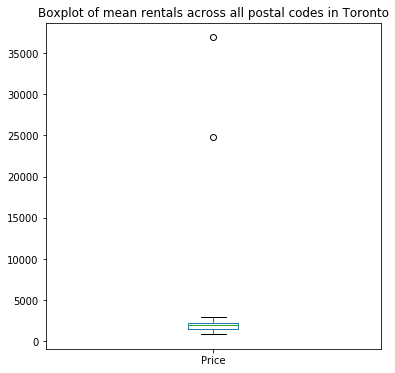

In [74]:
df2.plot(kind = 'box', figsize = (6,6))
plt.title('Boxplot of mean rentals across all postal codes in Toronto')
plt.show()

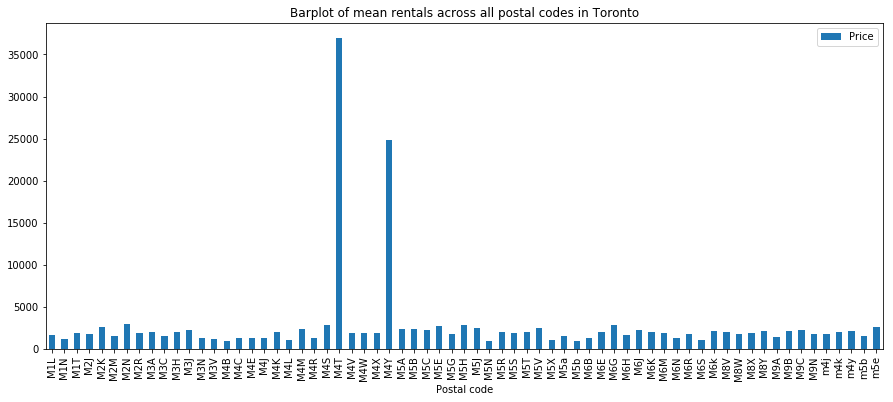

In [75]:
df2.plot.bar(figsize = (15,6))
plt.title('Barplot of mean rentals across all postal codes in Toronto')
plt.show()